#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic_df=pd.read_csv('/content/titanic_train.csv')

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


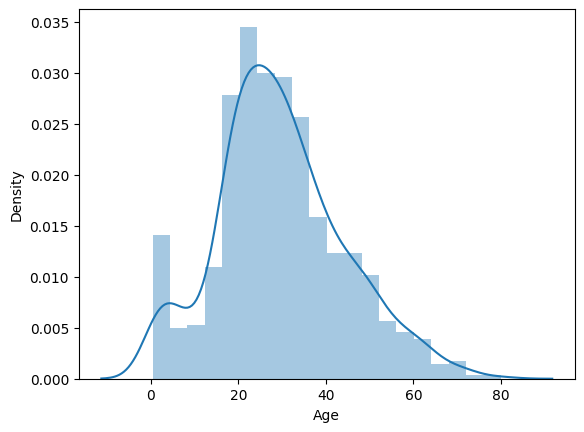

In [ ]:
sns.distplot(titanic_df['Age'],bins=20)
plt.show()

#Factors to Survive

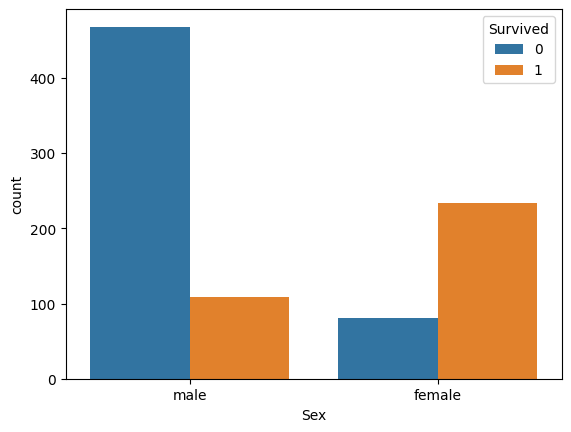

In [ ]:
sns.countplot(x='Sex', data=titanic_df, hue='Survived')
plt.show()

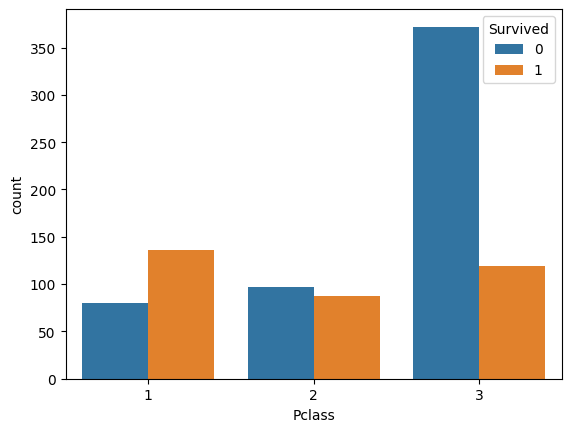

In [ ]:
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')
plt.show()

#Data Preparation

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Dropping less-significant features
titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
#Putting together the people who came along with someone
titanic_df['Together']= titanic_df['SibSp']+titanic_df['Parch']
titanic_df['Together'].loc[titanic_df['Together']>0]=1
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Together
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [ ]:
titanic_df['Sex']=titanic_df['Sex'].map({'male':0,'female':1})
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Together
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,0


<Axes: >

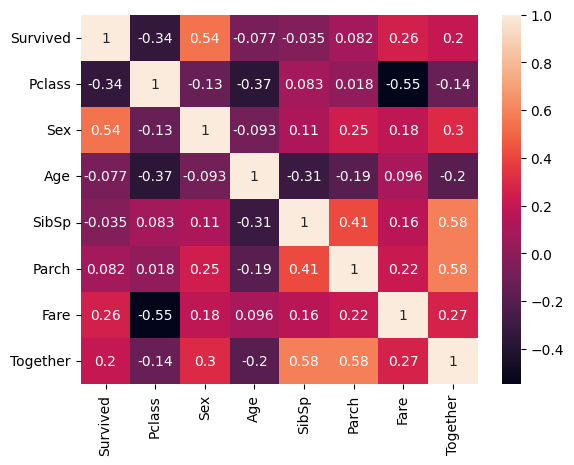

In [ ]:
sns.heatmap(titanic_df.corr(), annot=True)


In [ ]:
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Together,0


In [ ]:
print(int(titanic_df[titanic_df['Pclass']==1]['Age'].mean()))
print(int(titanic_df[titanic_df['Pclass']==2]['Age'].mean()))
print(int(titanic_df[titanic_df['Pclass']==3]['Age'].mean()))

38
29
25


In [ ]:
#Filling Null values of Age feature

In [ ]:
def fill_age(df):
  if pd.isna(df['Age']):
    if df['Pclass']==1:
      return 39
    elif df['Pclass']==2:
      return 30
    else:
      return 25
  else:
    return df['Age']

In [ ]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(fill_age,axis=1)
titanic_df.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Together
871,1,1,1,47.0,1,1,52.5542,1
872,0,1,0,33.0,0,0,5.0000,0
873,0,3,0,47.0,0,0,9.0000,0
874,1,2,1,28.0,1,0,24.0000,1
875,1,3,1,15.0,0,0,7.2250,0
876,0,3,0,20.0,0,0,9.8458,0
877,0,3,0,19.0,0,0,7.8958,0
878,0,3,0,25.0,0,0,7.8958,0
879,1,1,1,56.0,0,1,83.1583,1
880,1,2,1,25.0,0,1,26.0000,1


**Model Building**

In [ ]:
X=titanic_df.drop(columns=['Survived'])
y=titanic_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [ ]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X,y)

In [ ]:
y_pred=model.predict(X_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, f1_score

In [ ]:
model.score(X_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.89      0.73      0.81        79

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.84      0.84       179



In [ ]:
f1_score(y_test, y_pred)

0.8055555555555556

**Tree Visualization**

In [ ]:
from sklearn import tree

In [ ]:
features=X.columns

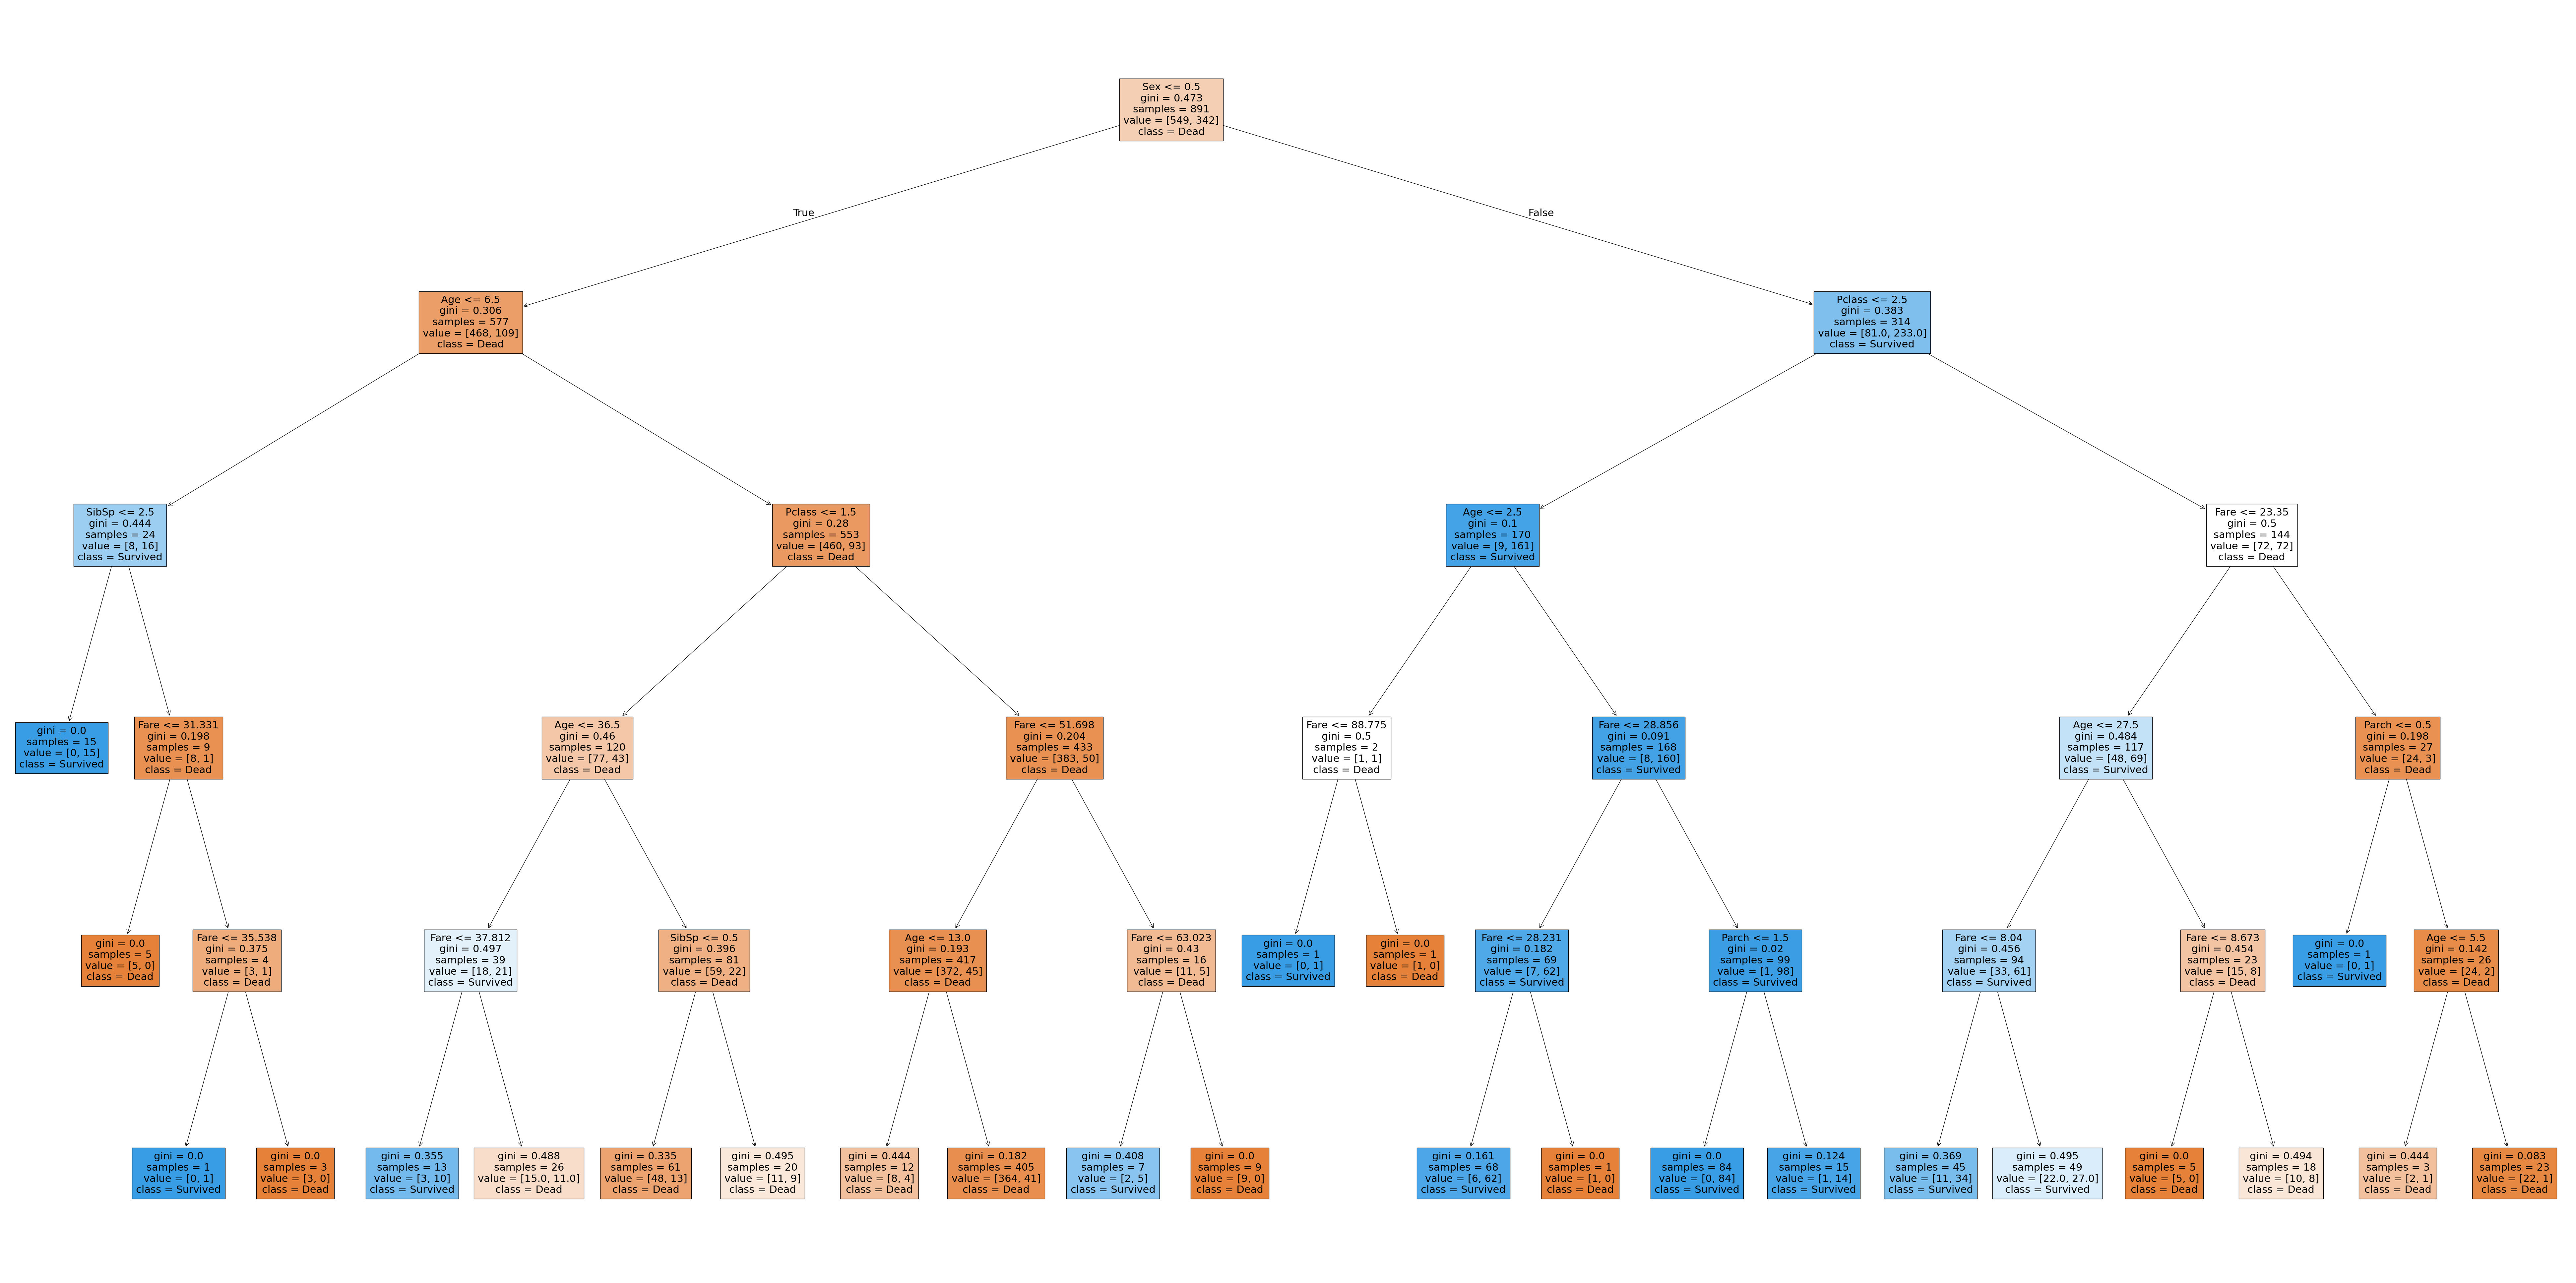

In [ ]:
plt.figure(figsize=(100,50))
result= tree.plot_tree(model, feature_names=features, class_names=['Dead','Survived'], filled=True)
plt.show()